In [54]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [10]:
target =  df.Survived
ind_var = df[['Pclass','Sex','Age','Fare']]

In [13]:
ind_var.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [21]:
le = LabelEncoder()
Sex_labeled =le.fit_transform(ind_var.Sex)
Sex_labeled[:5]

array([1, 0, 0, 0, 1])

In [22]:
ind_var['sex_n'] = Sex_labeled

C:\Users\Bonny B\AppData\Local\Temp\ipykernel_15864\2721013107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_var['sex_n'] = Sex_labeled


In [29]:
ind_var.drop('Sex',axis = 1,inplace=True)

C:\Users\Bonny B\AppData\Local\Temp\ipykernel_15864\3519688878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_var.drop('Sex',axis = 1,inplace=True)


In [41]:
ind_var.isna().mean()

Pclass    0.000000
Age       0.198653
Fare      0.000000
sex_n     0.000000
dtype: float64

In [56]:
ind_var.Age.fillna(ind_var.Age.mean(),inplace=True)
ind_var

C:\Users\Bonny B\AppData\Local\Temp\ipykernel_15864\3950376951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_var.Age.fillna(ind_var.Age.mean(),inplace=True)


,Pclass,Age,Fare,sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [51]:
x_train,x_test,y_train,y_test = train_test_split(ind_var,target)

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred = dt_model.predict(x_test)
dt_model.score(x_test,y_test)

0.7713004484304933

<AxesSubplot:>

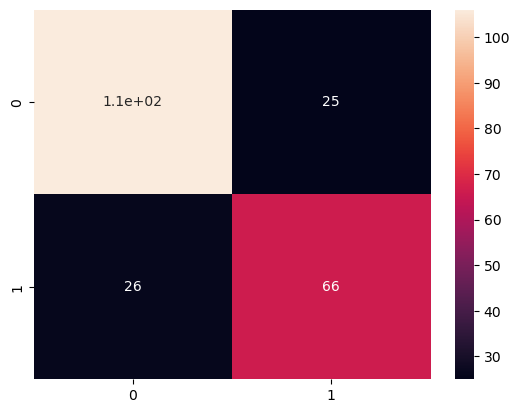

In [55]:
cm =confusion_matrix(y_pred,y_test)
sb.heatmap(cm,annot=True)